# Baseball Win Project

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the necessary Libraries

In [182]:
df=pd.read_csv('Baseball.csv')
print('Abbreviation Used in Column','\n','Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors')
df.head()

Abbreviation Used in Column 
 Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Loading the Dataset into Dataframe and Printing the First five Rows

In [223]:
df.shape

(30, 17)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [184]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

The Data does not have Missing Values

In [185]:
(df==0).astype(bool).sum(axis=0)

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

Here we see CG has 3 zero values

In [186]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

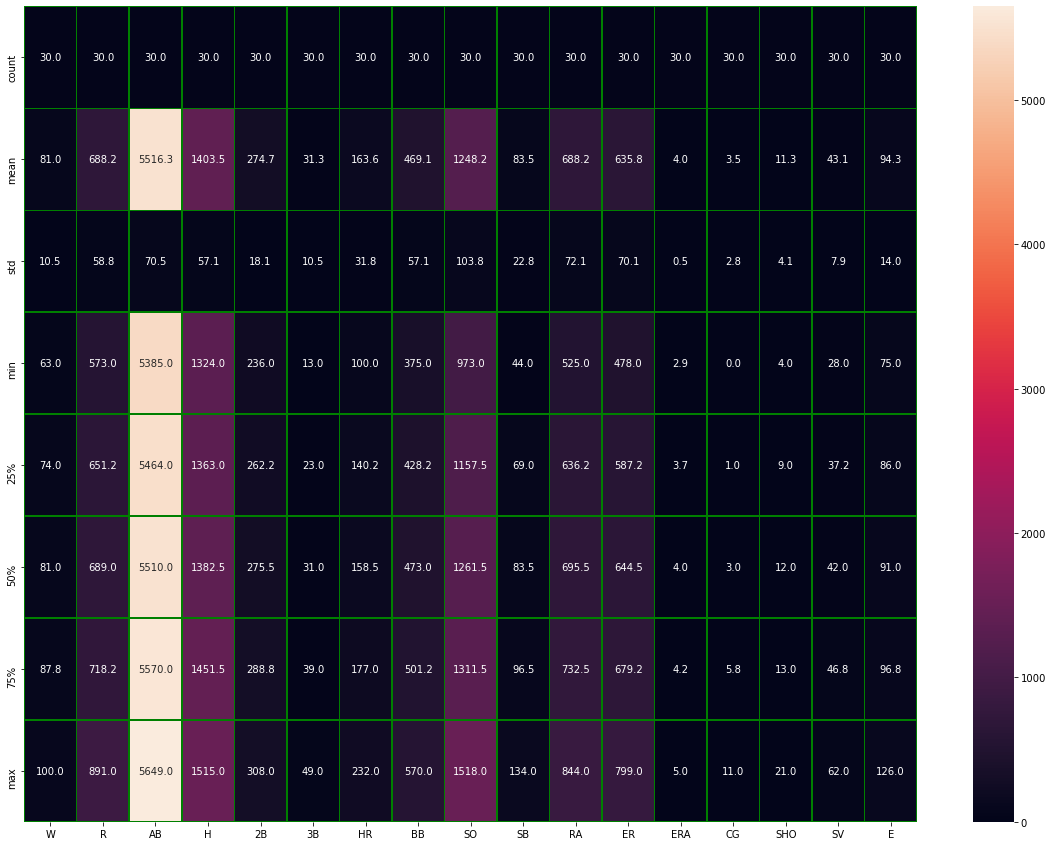

In [187]:
plt.figure(figsize=(20,15))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='green',fmt='0.1f')

Heat Map for Description of Dataset

<AxesSubplot:xlabel='W', ylabel='count'>

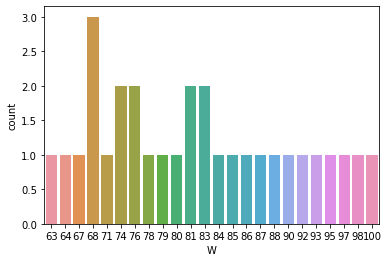

In [188]:
sns.countplot(x='W',data=df)

This Count Plot shows Win count of 68 three times.

<AxesSubplot:xlabel='R', ylabel='count'>

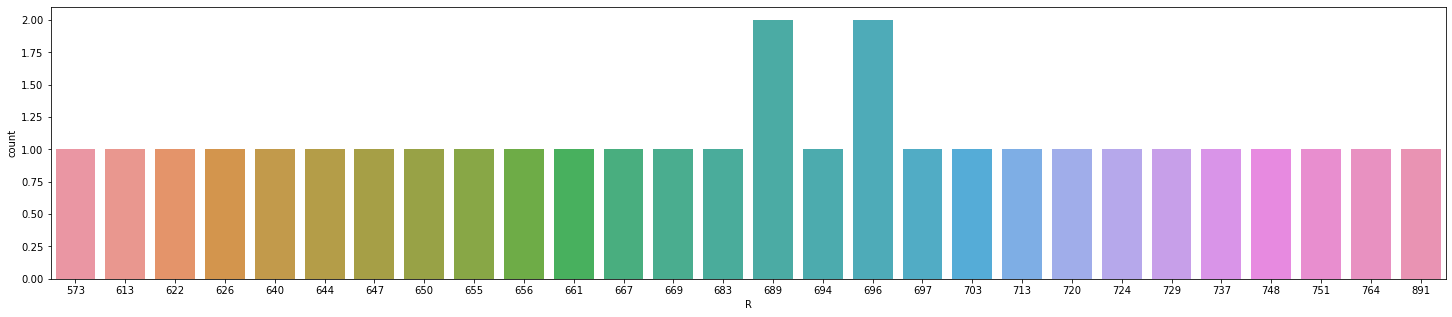

In [189]:
plt.figure(figsize=(25,5))
sns.countplot(x='R',data=df)

Count Plot of Runs 689 and 696 has been scored twice

<AxesSubplot:ylabel='Density'>

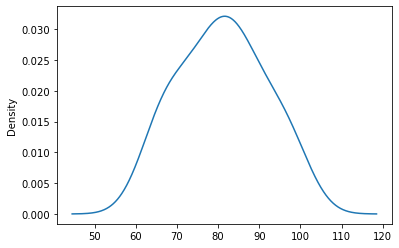

In [190]:
df['W'].plot.density()

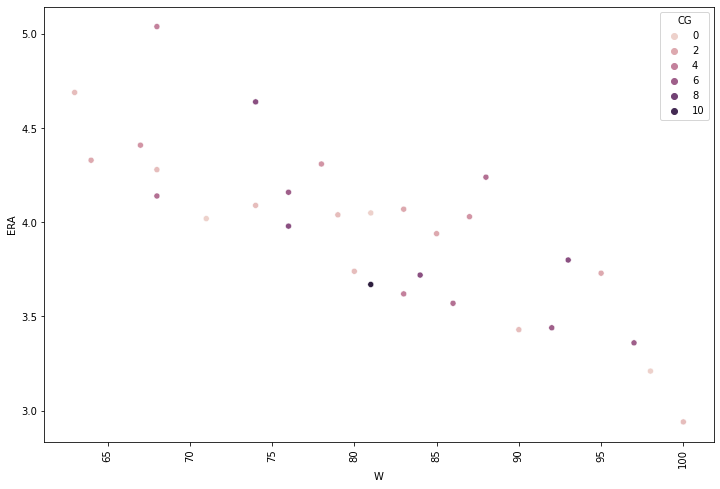

In [191]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.scatterplot(x='W',y='ERA',data=df,hue='CG')
plt.show()

This Scatter Plot showe negative relationship between Wins and Earned Run Average

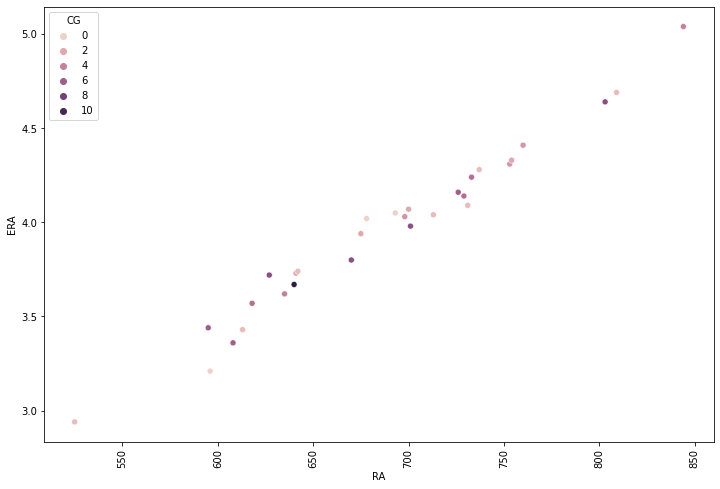

In [192]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.scatterplot(x='RA',y='ERA',data=df,hue='CG')
plt.show()

This Plot shows positive relationship Between Runs Allowd and Earned Run Average

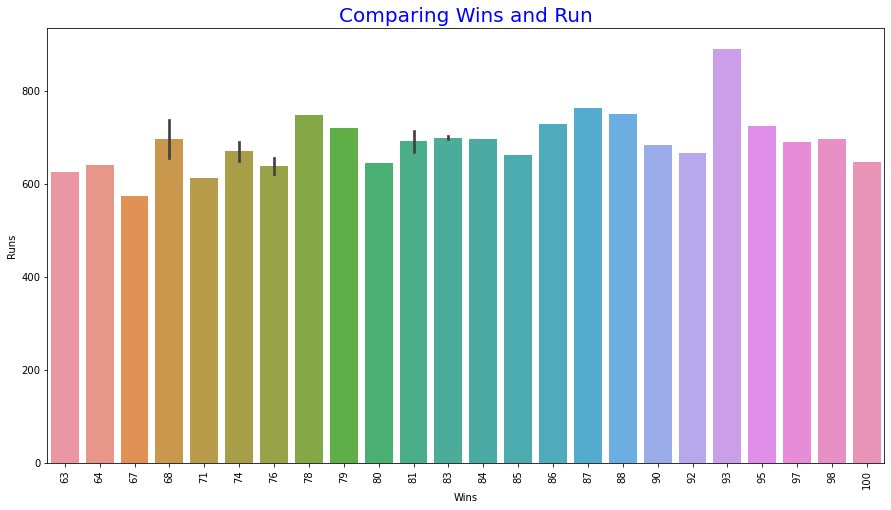

In [193]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['W'],y=df['R'])
plt.xlabel('Wins')
plt.xticks(rotation = 90)
plt.ylabel('Runs')
plt.title('Comparing Wins and Run', color = 'blue', fontsize = 20)
plt.show()

This plot shows relationship between Wins and Runs

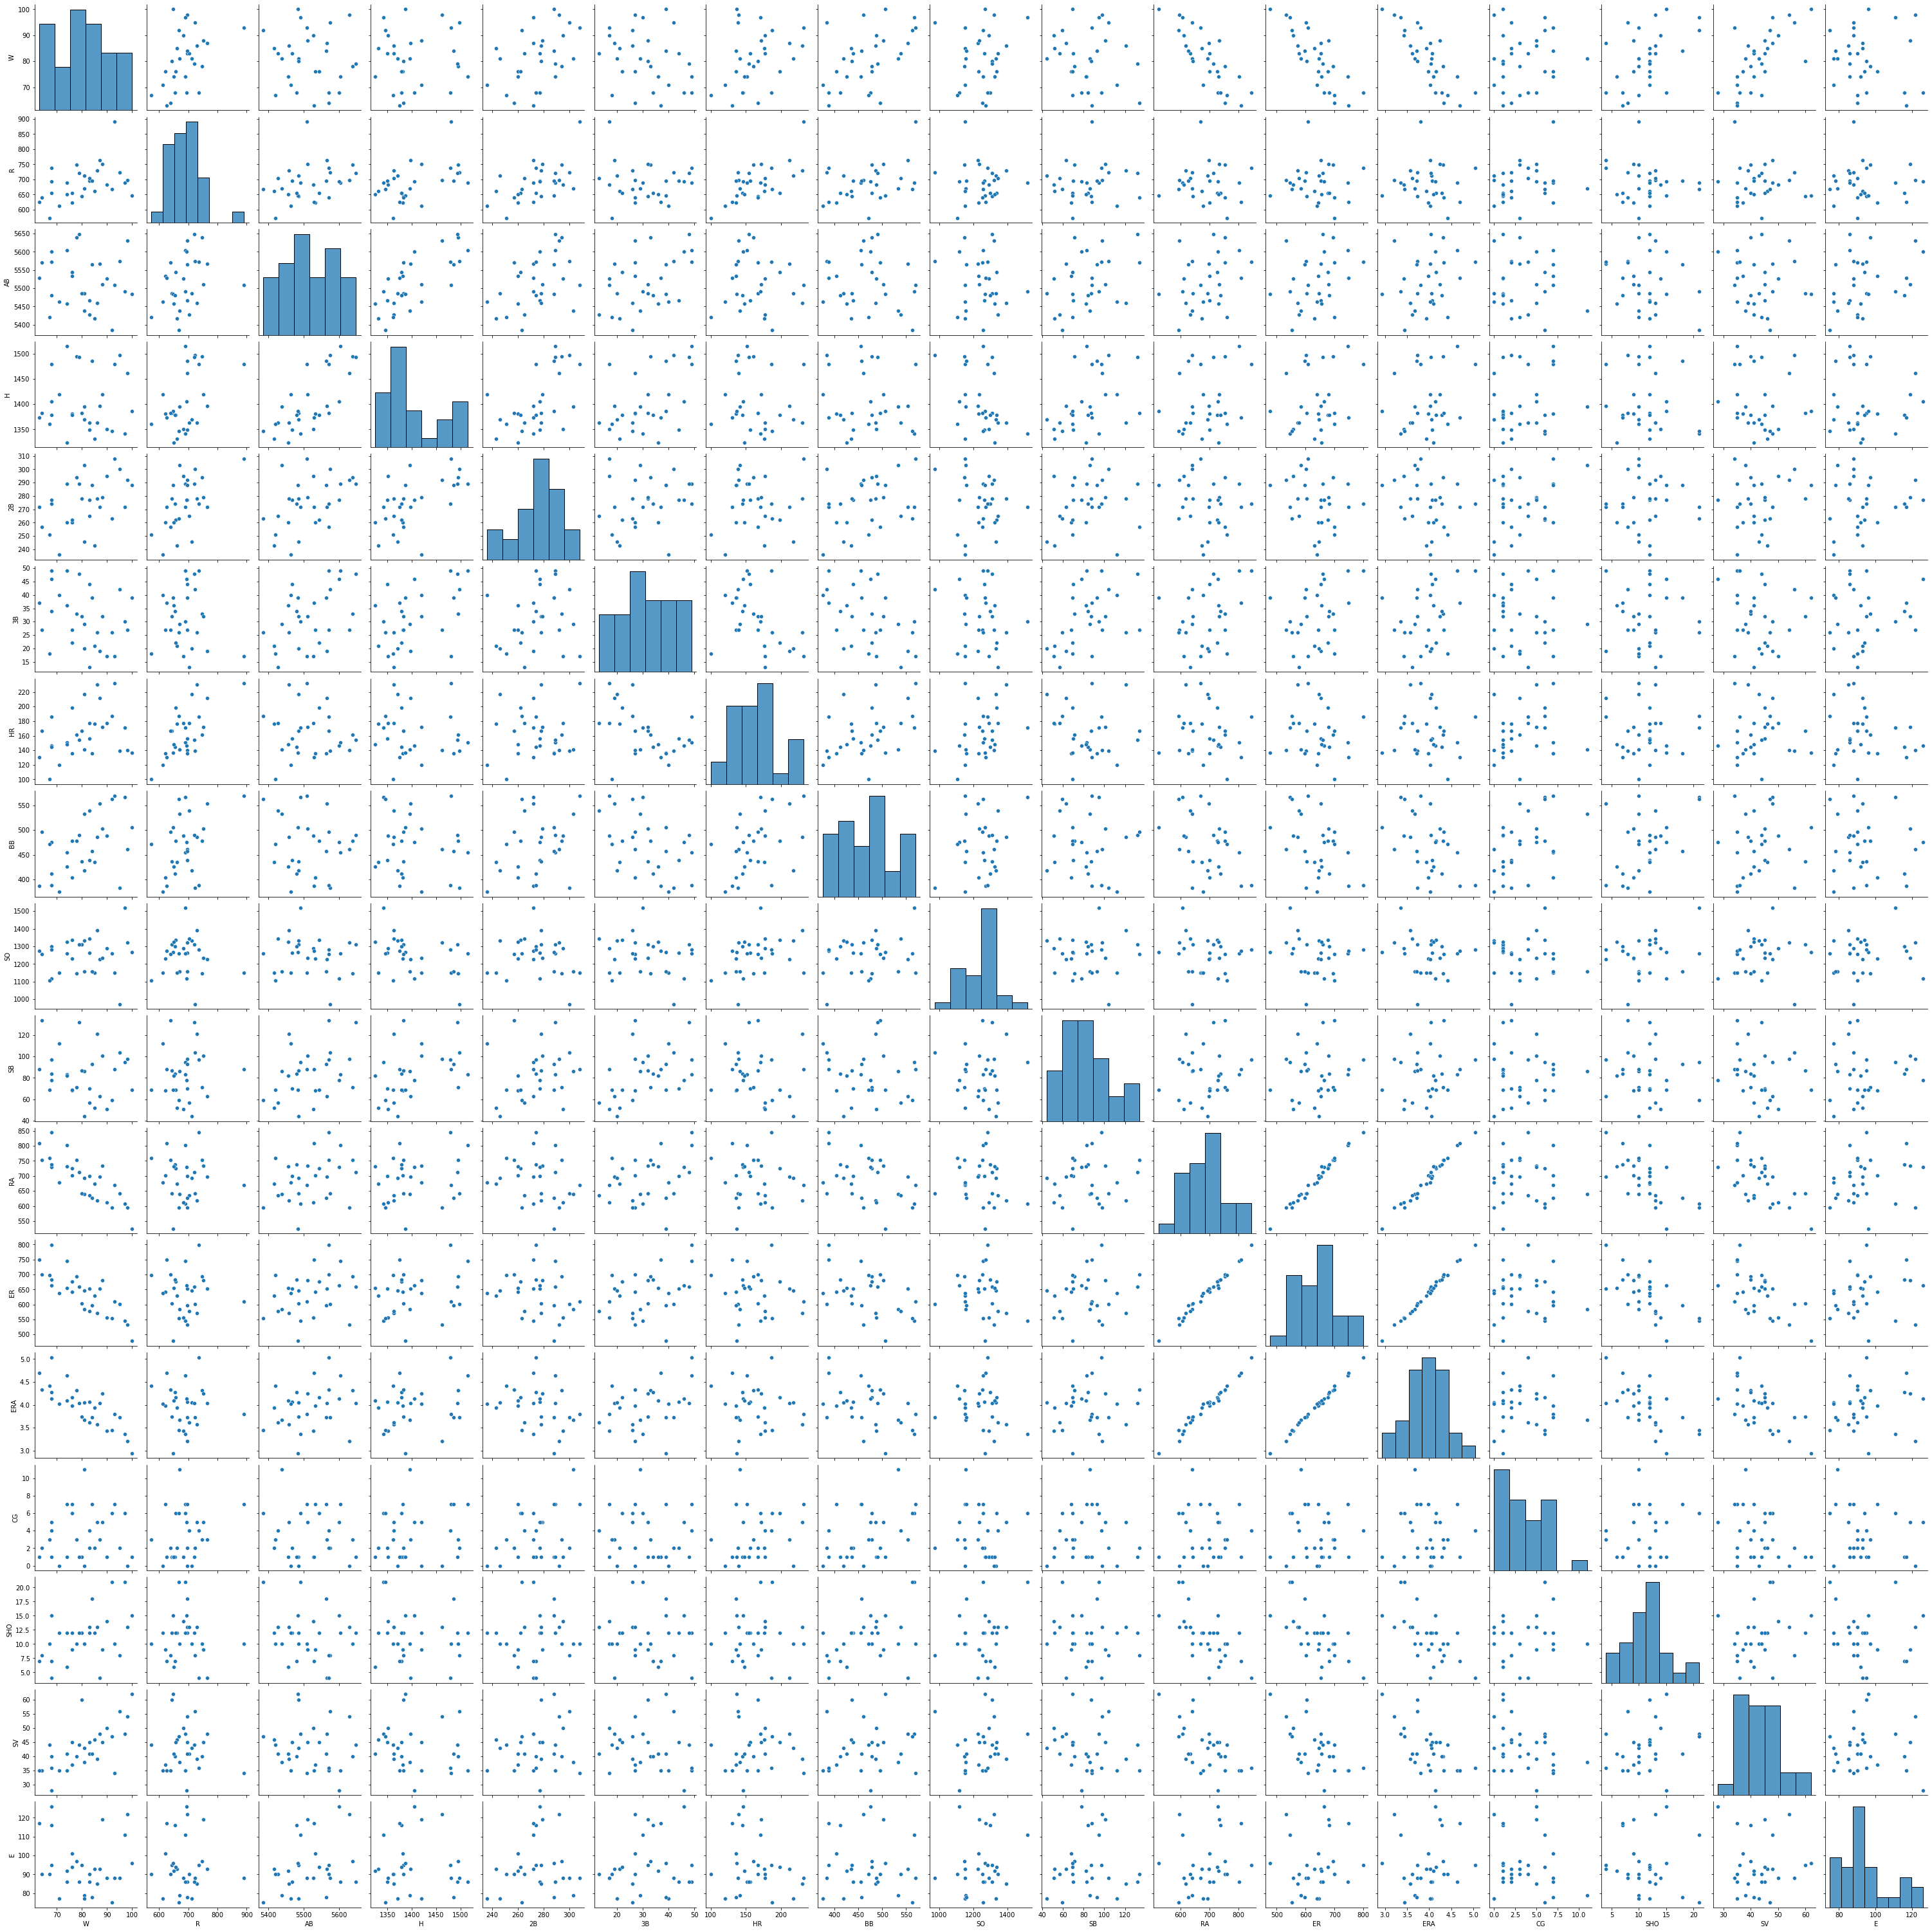

In [194]:
sns.pairplot(df)

This Pair Plot Shows the High Positive relationship between RA,ERA and ER

R      1.200786
E      0.890132
CG     0.736845
H      0.670254
SV     0.657524
SHO    0.565790
HR     0.516441
SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
W      0.047089
RA     0.045734
SO    -0.156065
2B    -0.230650
dtype: float64


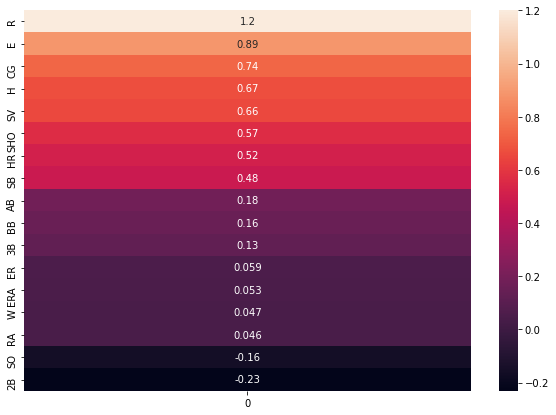

In [195]:
skew=df.skew().sort_values(ascending=False)
print(skew)
skew1=pd.DataFrame(skew)
plt.figure(figsize=(10,7))
sns.heatmap(skew1,annot=True)
plt.show()

This Skew heatmap shows that only SO and 2B are negatively skewed 

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64


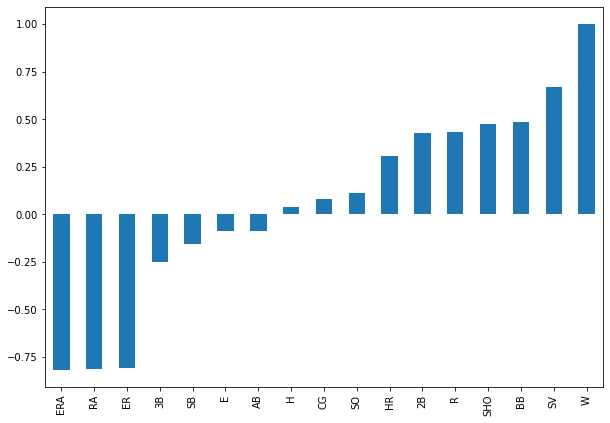

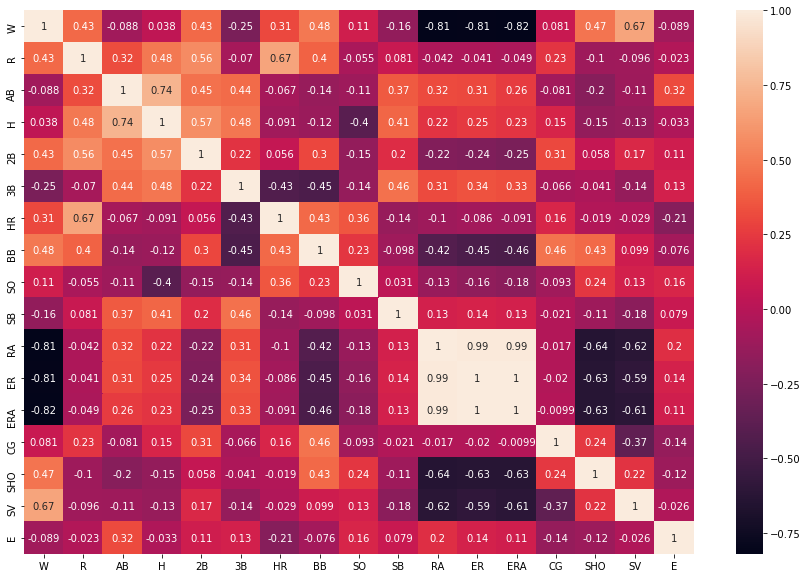

In [196]:
cor=df.corr()['W'].sort_values(ascending=True)
print(cor)
plt.figure(figsize=(10,7))
cor.plot(kind='bar')
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

THis Correlation Haetmap shows high positive relationship between RA,ERA and ER. Also relationship between RA,ERA and ER with W is highly negative.

<AxesSubplot:xlabel='W', ylabel='SV'>

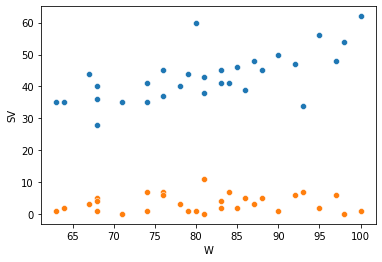

In [197]:
sns.scatterplot(x=df['W'],y=df['SV'])
sns.scatterplot(x=df['W'],y=df['CG'])

THis Scatter Plot shows relationship between W with SV and CG is almost a straight line, which means that the data are not very related.

# Removing Outliers

<AxesSubplot:>

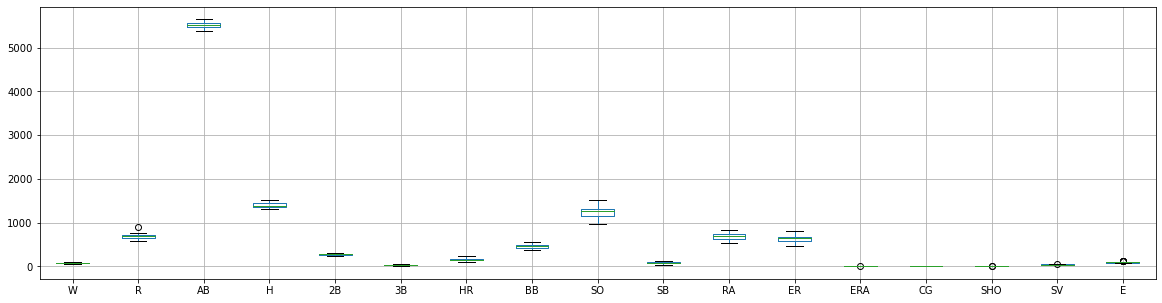

In [198]:
plt.figure(figsize=(20,5))
df.boxplot()

Box Plot for the Dataset

In [199]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df.apply(zscore)
threshold=3
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)
df1.head()

(30, 17)
(29, 17)


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Applying Zscore to improve the eeficiency of data.

In [200]:
x=df.drop('W',axis=1)
y1=df['W'].to_numpy()
y=pd.DataFrame(y1)
print(x.shape,y.shape)

(30, 16) (30, 1)


Sorting the data into variable and Target for modeling

# Support Vector Regression 

In [201]:
print(x.shape,y.shape)

(30, 16) (30, 1)


In [202]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
print(x.shape)
print(y.shape)

(30, 16)
(30, 1)


We apply the feature Scaling of the x and y before applying in SVR Model.

In [203]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    print(sv.fit(x_train,y_train))
    print(sv.score(x_train,y_train))

SVR(kernel='linear')
0.9386882935442369
SVR(kernel='poly')
0.8912417015263058
SVR()
0.9349679793868235


Hypertuning the Model to find the best fit

In [206]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(x,y)
y_pred = svr.predict(x)
y_pred

array([ 1.2650856 ,  0.12950593, -0.03033827, -0.58308116, -1.24181756,
        1.27061864,  0.61004991,  0.10304923,  0.90357612, -0.25116724,
        0.56574555,  0.58947782,  0.29285145, -0.21011726, -0.75661089,
        1.95239658,  1.55698752,  1.46005001, -0.81417462, -1.55468832,
        0.77918531,  0.51811899, -1.06954726, -1.25896356, -1.84821832,
        0.97316718,  0.42536093, -0.09115545, -0.58450085, -1.28278781])

Finding the SVR Targets

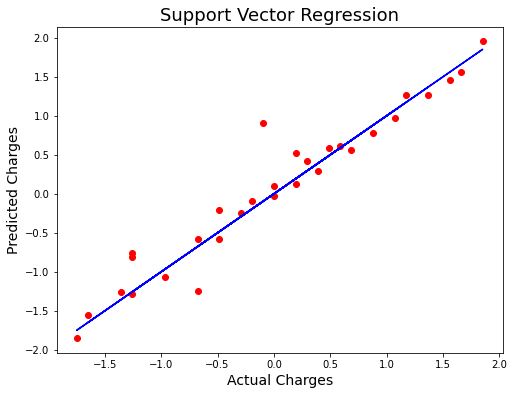

In [207]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y,y=y_pred,color='r')
plt.plot(y,y,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

Plotting the Actual Vs Predicted Data to see the results, we see that Actual Vs Predicted is quite close.

# Linear Regression

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [209]:
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuarcy is :- {r2_score(y_test,pred_test)}')
    print('\n') 

At random state 0,the training accuracy is :- 0.9609590618835543
At random state 0, the testing accuarcy is :- 0.6629341689506465


At random state 1,the training accuracy is :- 0.9715846357165403
At random state 1, the testing accuarcy is :- 0.3841724690075762


At random state 2,the training accuracy is :- 0.9898192153844543
At random state 2, the testing accuarcy is :- -2.0819989550103695


At random state 3,the training accuracy is :- 0.9722553885185529
At random state 3, the testing accuarcy is :- 0.461837897060247


At random state 4,the training accuracy is :- 0.9647461497996579
At random state 4, the testing accuarcy is :- 0.4660685292727742


At random state 5,the training accuracy is :- 0.950309288736999
At random state 5, the testing accuarcy is :- 0.7517105066858122


At random state 6,the training accuracy is :- 0.9489470045214469
At random state 6, the testing accuarcy is :- 0.8376419521868392


At random state 7,the training accuracy is :- 0.963197853591132
At random sta

At random state 85,the training accuracy is :- 0.9526629781970176
At random state 85, the testing accuarcy is :- 0.8407963276845563


At random state 86,the training accuracy is :- 0.9543878085444036
At random state 86, the testing accuarcy is :- 0.7404936612670691


At random state 87,the training accuracy is :- 0.9631177788804778
At random state 87, the testing accuarcy is :- 0.3095696288137648


At random state 88,the training accuracy is :- 0.9774273263600963
At random state 88, the testing accuarcy is :- -4.229901909248934


At random state 89,the training accuracy is :- 0.9722162780072605
At random state 89, the testing accuarcy is :- -0.7798144825334632


At random state 90,the training accuracy is :- 0.9530090276344044
At random state 90, the testing accuarcy is :- 0.8300294405682676


At random state 91,the training accuracy is :- 0.9535273897994729
At random state 91, the testing accuarcy is :- 0.6922110717277741


At random state 92,the training accuracy is :- 0.965037509023

Fitting SVR to the dataset. 
Predicting a new result

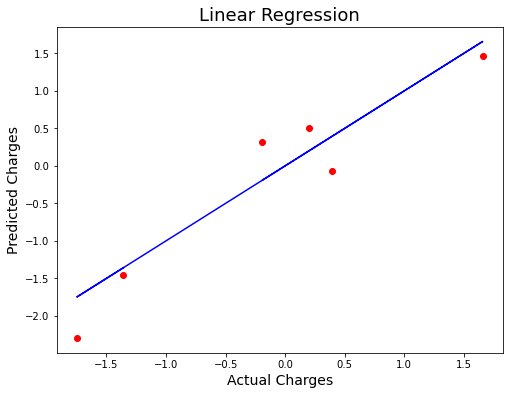

In [210]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

Plotting the Actual Vs Predicted Data to see the results

# Cross Validation Score

In [211]:
from sklearn.model_selection import cross_val_score

In [212]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At Cross fold {j} the cv score is {cv_mean}, accuracy score of training is {train_accuracy} and accuracy score of testing is {test_accuracy}')
    print('\n')

At Cross fold 2 the cv score is -0.9911855504647524, accuracy score of training is 0.9531948414942486 and accuracy score of testing is 0.8804448045510331


At Cross fold 3 the cv score is 0.2258846016773973, accuracy score of training is 0.9531948414942486 and accuracy score of testing is 0.8804448045510331


At Cross fold 4 the cv score is 0.24952166654369337, accuracy score of training is 0.9531948414942486 and accuracy score of testing is 0.8804448045510331


At Cross fold 5 the cv score is 0.0407554066745627, accuracy score of training is 0.9531948414942486 and accuracy score of testing is 0.8804448045510331


At Cross fold 6 the cv score is 0.2515353093718664, accuracy score of training is 0.9531948414942486 and accuracy score of testing is 0.8804448045510331


At Cross fold 7 the cv score is 0.3890804644289486, accuracy score of training is 0.9531948414942486 and accuracy score of testing is 0.8804448045510331


At Cross fold 8 the cv score is 0.31937022109668056, accuracy score 

Here Cross validating the result we can see that Accuracy score of 88%

# Regularisation

Here we use Lasso for Regularisation

In [214]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [215]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


Applying Grid Search on Lass we got alpha and random state as 0.1 and 0 resp.

In [216]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9214049294917911

After Prediting with Lasso we get r2 score of 92%

In [217]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5171805046732295

In [ ]:
CV mean for Lassp is 51%

# Ensemble Technique

In [218]:
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [219]:
rf=RandomForestRegressor(criterion='mae',max_features='log2')
rf.fit(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 Score',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

r2 Score 76.39977445150706
Cross Val Score: -39.938882080229845


In this we find the parameters using gridsearch and applying to Random Forest Regressor we found r2 acore of 76%.

# Conclusion

From the above Model we can see that Lasso has the highest Score hence we use Lasso Regressor Model

# Saving Model

In [222]:
import pickle
filename='lssmodel.pkl'
pickle.dump(lss, open(filename,'wb'))